In [ ]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map


# block_coordinates = [(0,0),(0,5),(5,5),(5,0)]
block_coordinates = [(0,0),(0,1),(1,1),(1,0)]

# print(list(block_coordinates[3]))
node_numbers = [100, 100]

space = Mesh(block_coordinates, node_numbers) #it seems like a one block. Build more sopisticated block type structures
# space.nonuniform_block_mesh_2D(-1.2, -1.4)
# space.nonuniform_mesh_2D(-1.2, -1.4)

#|----------------------------------------------
a, b = space.nonuniform_block_mesh_2D(1, 1)

circle = object()
rectangle = object()
bl = object()


# circle.circle(0.15, (0.4,0.4))
property_map = Map(space)
# rectangle.rectang(0.9, 0.2, (0.65,0.4))
# property_map.create_object(circle)
# property_map.create_object(rectangle)
# rectangle.rectang(1.0, 0.05, (0.5,0.1))
# property_map.create_object(rectangle)
property_map.show()
#|-----------------------------------------------

# property_map.show()
# circle.circle(0.4, (3.4,2.4))
# space.create_object(circle)
# circle.circle(0.4, (2.4,1.4))
# space.create_object(circle)
#


BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'N'}
BCs_values = {'W': 1, 'S': 0, 'E': 0.1, 'N': 0}


solution = PDE_2D_Solver(space,BCs)
solution.solver(BCs_values, "potensial", property_map, 1.4, 1e-2, itteration_type="nodebynode")

# solution.countour()

# compt_dom = Mesh(block_coordinates, node_numbers)
# compt_dom.uniform_block_mesh_2D()

# compt_dom.plot2D()
# space.plot2D()
# compt_dom.Jacobi(a, b)
# print(compt_dom.Jacobian)

# print(OneDcentraldiff(compt_dom.matricies[0], a))
# print(OneDcentraldiff(compt_dom.matricies[0], b, axis=1))
# print(OneDcentraldiff(compt_dom.matricies[1], a))
# print(OneDcentraldiff(compt_dom.matricies[1], -b, axis=1))
# compt_dom.matricies[1] 




In [ ]:
solution.velocityfield("stream")
solution.plot2D("stream")
solution.stream()
solution.quiver()

In [ ]:
solution.velocityfield("potensial")
solution.plot2D("potensial")
solution.streamplot()
solution.quiver()
phii = solution.solution
a = solution.velocity[:,:,0]
cont = solution.continuity

In [ ]:
Uinf = np.mean(-solution.velocity[:,:,0])
nu = 1.81e-2
x = np.linspace(0.001,1,(node_numbers[0]))
Re = Uinf*x/nu
delta = 5 * x / np.sqrt(Re)
delta_idx = np.round(delta*len(delta))


bl.boundary_layer(delta_idx)
property_map.create_object(bl)
property_map.show()

In [ ]:
solution_BL = PDE_2D_Solver(space,BCs)
solution_BL.solver(BCs_values, "potensial", property_map, 1.4, 1e-5, itteration_type="nodebynode")

solution_BL.velocityfield("potensial")
solution_BL.plot2D("potensial")
solution_BL.streamplot()
solution_BL.quiver()
phii = solution.solution
a = solution.velocity[:,:,0]
cont = solution.continuity

areea = property_map.area

Iteration:  0 Error is:  0.9265875167897464
Iteration:  1000 Error is:  0.00047979113010354624
Iteration:  2000 Error is:  0.00011046849541662684
Iteration:  3000 Error is:  3.920073919028155e-05
Iteration:  4000 Error is:  1.430040573791036e-05
Iteration:  5000 Error is:  5.278548908194125e-06
Iteration:  6000 Error is:  1.9508797675371614e-06
Iteration:  7000 Error is:  7.188205721798957e-07
Iteration:  8000 Error is:  2.639198680917665e-07
Iteration:  9000 Error is:  9.654680693804707e-08
Iteration:  10000 Error is:  3.523600897170631e-08
Iteration:  11000 Error is:  1.284047992933246e-08
Iteration:  12000 Error is:  4.675217712968305e-09
Iteration:  13000 Error is:  1.7014548936433727e-09
Iteration:  14000 Error is:  6.190332690891864e-10
Iteration:  15000 Error is:  2.2519333620074633e-10
Iteration:  16000 Error is:  8.191769484966471e-11
Iteration:  17000 Error is:  2.979777535827566e-11
Iteration:  18000 Error is:  1.0839162900566635e-11
Psi is calculated with residual:  9.99658

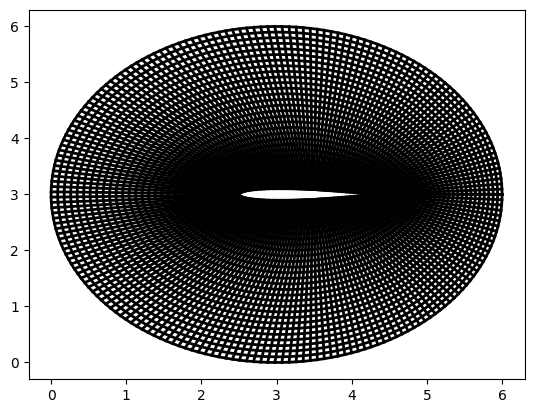

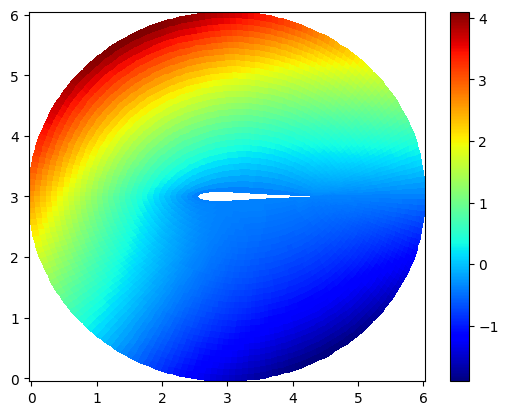

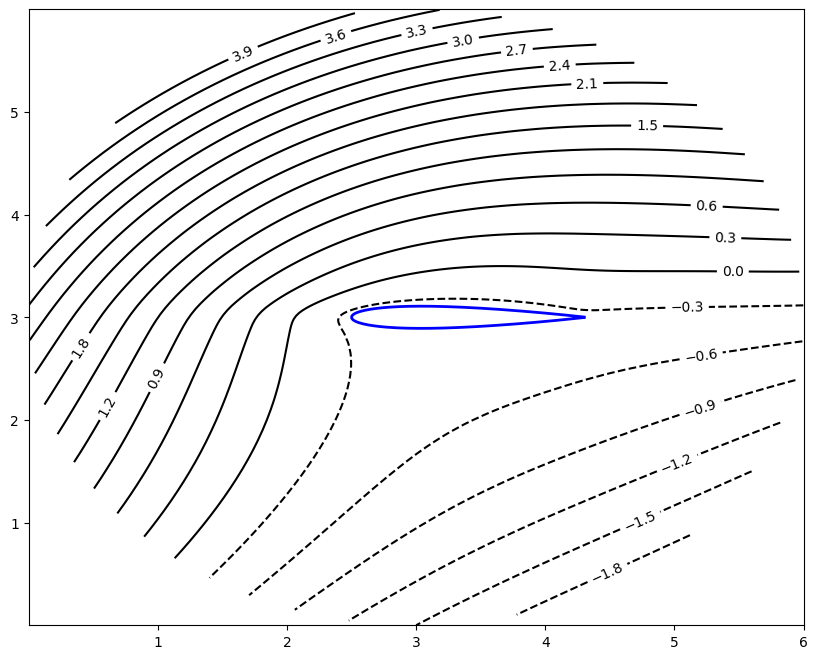

In [3]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from Domain import ElippticMesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map
import scipy as sp
from importtools import import_geometry
from solvers import eliptic_PDE_solver, Periodic_a_b_c
from airfoils import *


def circles(x, y, r):
    th = np.linspace(0, 2 * np.pi, 200)
    xunit = r * np.cos(th) + x
    yunit = r * np.sin(th) + y
    circle_list = np.array([xunit, yunit]).T
    return circle_list


def plotMesh(x, y):
    for i in range(len(x[:, 0])):
        plt.plot(x[i, :], y[i, :], 'k-', lw=2)
    for i in range(len(x[0, :])):
        plt.plot(x[:, i], y[:, i], 'k-', lw=2)


# rBC = 5.0    # the radius of outer boundary
# m, p, t, c = 0.02, 0.4, 0.12, 1.0    # parameters of NACA 2412 airfoil

# # Initialize x[i, j] and y[i, j]

# Nxi = 51
# Neta = 21
# x = np.empty((Nxi, Neta))
# y = np.empty((Nxi, Neta))

# # Generate grid points on airfoil surface
# Nxc = int((Nxi-1) / 2 + 1)
# xc = np.linspace(0., 1., Nxc)
# xU, yU = AF(xc, 0.12, 1, 0.02, 0.4, 1.0)
# xL, yL = AF(xc, 0.12, -1, 0.02, 0.4, 1.0)

# x[:Nxc, 0] = xL[-1::-1].copy()
# x[Nxc:, 0] = xU[1:].copy()

# y[:Nxc, 0] = yL[-1::-1].copy()
# y[Nxc:, 0] = yU[1:].copy()

# # Generate grid points on circular outer boundary
# # and set x_{i, j=-1}, y_{i, j=-1}
# dr = 2. * np.pi / (Nxi -1)
# th = - np.array([i * dr for i in range(Nxi)])
# x[:, -1] = rBC * np.cos(th) + 0.5 * c
# y[:, -1] = rBC * np.sin(th)

# GAMA1 = np.array([x[:,0], y[:,0]]).T
# GAMA2 = np.array([x[:,-1], y[:,-1]]).T

# space_trial = ElippticMesh([Nxi, Neta], GAMA1, GAMA2) 
# space_trial.create_elipticmesh()
# space_trial.plot_mesh()


naca0012 = import_geometry('naca0012.txt')
naca0012 = closeshape_interpolation(naca0012, 200)
circleee = circles(3, 3, 3)
naca0012[:,:] = naca0012[:,:] * 1.8
naca0012[:,0] += 2.5
naca0012[:,1] += 3
node_numbers = [200, 30]
space_trial = ElippticMesh(node_numbers, naca0012, circleee) 
space_trial.create_elipticmesh()
X, Y = space_trial.X, space_trial.Y

# plt.figure(1)
# plotMesh(X, Y)

# X = X.T
# Y = Y.T

# for i in range(1000):
#     a, b, c = Solve_a_b_c(X, Y)
#     X[1:-1, 1:-1] = SolveEq(a, b, c, X)
#     Y[1:-1, 1:-1] = SolveEq(a, b, c, Y)

# plt.figure(2)
plotMesh(X, Y)


# space_trial.plot_mesh()

Vinf = 1
AOA = np.pi / 6

Out_psi = - space_trial.X[-1, :] * Vinf * np.sin(AOA) + space_trial.Y[-1, :] * Vinf * np.cos(AOA)

BCvalues = {'Out': Out_psi, 'In': 0, 'Cut1': 0, 'Cut2': 0}
stream_naca0012 = eliptic_PDE_solver(space_trial, BCvalues)

# X = space_trial.X
# Y = space_trial.Y

X_temp = np.concatenate((np.reshape([X[:, -2]], (X.shape[0], 1)), X[:, :2]), 1)
Y_temp = np.concatenate((np.reshape([Y[:, -2]], (Y.shape[0], 1)), Y[:, :2]), 1)
alpha_temp, beta_temp, gamma_temp = Periodic_a_b_c(X_temp, Y_temp)

BCcut = stream_naca0012.solver()
stream_naca0012.plot2D()
stream_naca0012.contour()

psi = stream_naca0012.solution



# block_coordinates = [(0,-0.8),(0,0.8),(3.5,0.8),(3.5,-0.8)]
# node_numbers = [200, 300]
# space_trial = Mesh(block_coordinates, node_numbers) 

# a, b = space_trial.uniform_block_mesh_2D()

# airfoil = object()
# airfoil.airfoil(naca0012, scale=2.3)
# airfoil_map = Map(space_trial)
# airfoil_map.create_object(airfoil)
# airfoil_map.show()

# area_matrix = airfoil_map.area


# BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'N'}
# BCs_values = {'W': 1, 'S': 0, 'E': 0, 'N': 0}

# solution = PDE_2D_Solver(space_trial,BCs)
# solution.solver(BCs_values, "potensial", airfoil_map, 1.5, 0.12, itteration_type="nodebynode")

# solution.velocityfield("potensial")
# solution.plot2D("potensial")
# solution.stream()
# solution.quiver()




In [ ]:
import numpy as np
import pickle as pkl

#save the output data solution.solution to a file. the file name contains the solution type and the number of nodes, the object name solved and the BCs, and the BCs values.
#use parameters to change the file name 

def save_data(solution, solution_type, BCs, BCs_values, object_name, node_numbers):
    
    file_name = solution_type + "_" + str(node_numbers[0]) + "_" + str(node_numbers[1]) + "_" + object_name + "_"
    np.save(file_name, solution)
    print("data saved to file: " + file_name)

#load the data from the file
def load_data(file_name):
    data = np.loadtxt(file_name, delimiter=",")
    print("data loaded from file: " + file_name)
    return data

#save the data to a file
# save_data(solution.solution, "potensial", BCs, BCs_values, "airfoil", node_numbers)
save_data(solution.solution, "potensial", BCs, BCs_values, "airfoil_smalled", node_numbers)

# with open("airfoil.pkl", "wb") as f:
    # pkl.dump(solution, f)






In [ ]:
import pickle as pkl
with open("airfoil.pkl", "rb") as f:
    solution_temp = pkl.load(f)

In [ ]:
solution_temp.velocityfield("potensial")
solution_temp.plot2D("potensial")
solution_temp.stream()
solution_temp.quiver()


In [ ]:
# a = airfoil_map.area

X = space_trial.X

print(np.shape(X[:, :2]))
print(np.shape(X[:, -2]))
print(np.shape(X[:, -2].reshape((X.shape[0], 1))))

X_temp = np.concatenate((np.reshape([X[:, -2]], (X.shape[0], 1)), X[:, :2]), 1)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def AFyt(x, t, c):
    '''
    input: 
        x: x coordinate of center line, float
        t: maximum thickness, in fraction of chord length, float
        c: chord lrngth, float
    output:
        half thickness of airfoil at corresponding x coordinate
    '''
    return 5. * t * (0.2969 * ((x/c)**0.5) - 
                     0.126 * (x/c) - 
                     0.3516 * ((x/c)**2) + 
                     0.2843 * ((x/c)**3) - 
                     0.1036 * ((x/c)**4))



x = np.linspace(0., 1., 101)
plt.plot(x, AFyt(x, 0.14, 1.0), 'k-', lw=2)    # upper surface
plt.plot(x, - AFyt(x, 0.14, 1.0), 'k-', lw=2)  # lower surface
plt.axis('equal'); plt.ylim((-0.5, 0.5))

In [ ]:
def AFyc(x, m, p, c):
    '''
    input:
        x: x coordinate of center line, float
        m: the maximum camber (100 m is the first of the four digits), float
        p: location of maximum camber (10 p is the second digit), float
        c: chord lrngth, float
    output:
        y coordinate of center line at corresponding x coordinate
    '''
    if (x >= 0.0) and (x <= p*c):
        return m * x * (2. * p - (x/c)) / (p**2.)
    elif (x > p*c) and (x <= c):
        return m * (c - x) * (1. + (x/c) - 2. * p) / ((1. - p)**2)
    else:
        raise ValueError


def AFth(x, m, p, c):
    '''
    input:
        x: x coordinate of center line, float
        m: the maximum camber (100 m is the first of the four digits), float
        p: location of maximum camber (10 p is the second digit), float
        c: chord lrngth, float
    output:
        angle between center and horizontal line at corresponding x coordinate
    '''
    if (x >= 0.0) and (x <= p*c):
        return np.arctan(2.0 * m * (p - (x/c)) / (p**2))
    elif (x > p*c) and (x <= c):
        return np.arctan(2.0 * m * (p - (x/c)) / ((1. - p)**2))
    else:
        raise ValueError

def AF(x, t, sign, m, p, c):
    '''
    input:
        x: x coordinate of center line, float
        t: maximum thickness, in fraction of chord length, float
        sign: indicate upper (1) or lower (-1) surface of airfoil
        m: the maximum camber (100 m is the first of the four digits), float
        p: location of maximum camber (10 p is the second digit), float
        c: chord lrngth, float
    output:
        x, y coordinates on airfoil surface at corresponding 
        center line x coordinate
    '''
    if (m == 0.) or (p == 0):
        return x, sign * AFyt(x, t, c)
    else:
        return np.array([x[i] - 
                         sign * AFyt(x[i], t, c) * np.sin(AFth(x[i], m, p, c)) 
                         for i in range(np.size(x))]), \
               np.array([AFyc(x[i], m, p, c) + 
                         sign * AFyt(x[i], t, c) * np.cos(AFth(x[i], m, p, c))
                         for i in range(np.size(x))])


x = np.linspace(0., 1., 101)
xU, yU = AF(x, 0.12, 1, 0.02, 0.4, 1.0)
xL, yL = AF(x, 0.12, -1, 0.02, 0.4, 1.0)
plt.plot(xU, yU, 'k-', lw=2)
plt.plot(xL, yL, 'k-', lw=2)
plt.axis('equal'); plt.ylim((-0.5, 0.5))

In [ ]:

Nxi = 51
Neta = 21
eta, xi = np.meshgrid(np.linspace(0, Neta-1, Neta), np.linspace(0, Nxi-1, Nxi))

rBC = 5.0    # the radius of outer boundary
m, p, t, c = 0.02, 0.4, 0.12, 1.0    # parameters of NACA 2412 airfoil

# Initialize x[i, j] and y[i, j]
x = np.empty((Nxi, Neta))
y = np.empty((Nxi, Neta))

# Generate grid points on airfoil surface
Nxc = int((Nxi-1) / 2 + 1)
xc = np.linspace(0., 1., Nxc)
xU, yU = AF(xc, 0.12, 1, 0.02, 0.4, 1.0)
xL, yL = AF(xc, 0.12, -1, 0.02, 0.4, 1.0)

# Set x_{i, j=0} and y_{i, j=0}
x[:Nxc, 0] = xL[-1::-1].copy()
x[Nxc:, 0] = xU[1:].copy()

y[:Nxc, 0] = yL[-1::-1].copy()
y[Nxc:, 0] = yU[1:].copy()

# Generate grid points on circular outer boundary
# and set x_{i, j=-1}, y_{i, j=-1}
dr = 2. * np.pi / (Nxi -1)
th = - np.array([i * dr for i in range(Nxi)])
x[:, -1] = rBC * np.cos(th) + 0.5 * c
y[:, -1] = rBC * np.sin(th)




for i in range(Nxi):
    x[i, 1:-1] = np.linspace(x[i, 0], x[i, -1], Neta)[1:-1]
    y[i, 1:-1] = np.linspace(y[i, 0], y[i, -1], Neta)[1:-1]




In [ ]:
def plotMesh(x, y):
    for i in range(Nxi):
        plt.plot(x[i, :], y[i, :], 'k.-', lw=2)
    for i in range(Neta):
        plt.plot(x[:, i], y[:, i], 'k.-', lw=2)


def Solve_a_b_c(x, y):
    '''
    input:
        x: the x coordinate of x_{i=i-1~i+1, j=j-1~j+1}, at least 3x3 array
        y: the y coordinate of y_{i=i-1~i+1, j=j-1~j+1}, at least 3x3 array
    output:
        a, b, c: at least 1x1 float
    '''
    a = 0.25 * (((x[1:-1, 2:] - x[1:-1, :-2])**2) + 
                ((y[1:-1, 2:] - y[1:-1, :-2])**2))
    b = 0.25 * ((x[2:, 1:-1] - x[:-2, 1:-1]) * 
                (x[1:-1, 2:] - x[1:-1, :-2]) + 
                (y[2:, 1:-1] - y[:-2, 1:-1]) * 
                (y[1:-1, 2:] - y[1:-1, :-2]))
    c = 0.25 * (((x[2:, 1:-1] - x[:-2, 1:-1])**2) + 
                ((y[2:, 1:-1] - y[:-2, 1:-1])**2))
    return a, b, c

def SolveEq(a, b, c, U):
    '''
    input:
        a, b, c: as described in the content
        U: the result of the last iteration
    output:
        return the result of current iteration
    '''
    return 0.5 * (
                  a * (U[2:, 1:-1] + U[:-2, 1:-1]) + 
                  c * (U[1:-1, 2:] + U[1:-1, :-2]) -
                  b * 0.5 * (U[2:, 2:] - U[2:, :-2] + U[:-2, :-2] - U[:-2, 2:])
                 ) / (a + c)

iters=0

while True:
    
    # count the number of iterations
    iters += 1
    
    # backup the last result
    xn = x.copy()
    yn = y.copy()
    
    # solve periodic BC first
    tempx = np.append([x[-2, :].copy()], x[0:2, :].copy(), 0) 
    tempy = np.append([y[-2, :].copy()], y[0:2, :].copy(), 0)
    a, b, c = Solve_a_b_c(tempx, tempy)
    x[0, 1:-1] = SolveEq(a, b, c, tempx)
    y[0, 1:-1] = SolveEq(a, b, c, tempy)

    x[-1, 1:-1] = x[0, 1:-1].copy()
    y[-1, 1:-1] = y[0, 1:-1].copy()
    
    # solve interior
    a, b, c = Solve_a_b_c(x, y)
    x[1:-1, 1:-1] = SolveEq(a, b, c, x)
    y[1:-1, 1:-1] = SolveEq(a, b, c, y)
    
    # calculate difference between current and the last result
    errx = np.abs(x - xn)
    erry = np.abs(y - yn)

    if iters % 100 == 0:
        print('iter = ', iters, 'errx.max = ', errx.max(), 'erry.max = ', erry.max())
    
    # adjudge whether the iteration should stop
    if (errx.max() <= 1e-6) and (erry.max() <= 1e-6):
        break

plt.figure(figsize=(8, 8), dpi=100)
plotMesh(x, y)
plt.axis('equal')
plt.xlim((-4.5, 5.5)); plt.ylim((-5, 5))

In [ ]:
# set angle of attact
AOA = 10. / 180. * np.pi

# set free stream velocity
Vinf = 70.

# initialize stram functions
stream = np.zeros((Nxi, Neta))

# set up the BCs on the outer boundary
stream[:, -1] = - x[:, -1] * Vinf * np.sin(AOA) + y[:, -1] * Vinf * np.cos(AOA)

# solve the PDE by iterative method
iters = 0
while True:
    
    # count the number of current interation
    iters += 1
    
    # backup the last result
    stream_n = stream.copy()
    
    # apply periodic BC on dividing line
    temp = np.append([stream[-2, :].copy()], stream[:2, :].copy(), 0)
    tempx = np.append([x[-2, :].copy()], x[:2, :].copy(), 0) 
    tempy = np.append([y[-2, :].copy()], y[:2, :].copy(), 0)
    a, b, c = Solve_a_b_c(tempx, tempy)
    stream[0, 1:-1] = SolveEq(a, b, c, temp)
    stream[-1, :] = stream[0, :].copy()
    
    # apply Kutta condition 
    # and set the value of stream function on the airfoil surface
    stream[:, 0] = stream[0, 1]

    # solve interior
    a, b, c = Solve_a_b_c(x, y)
    stream[1:-1, 1:-1] = SolveEq(a, b, c, stream)
    
    # calculate difference between current and the last result
    err = np.abs(stream - stream_n)
    
    # adjudge whether the iteration should stop
    if (err.max() <= 1e-6):
        break

stream = stream - stream[0, 0]

# set the contour lines with negative values to be solid lines
import matplotlib as mpl
mpl.rcParams['contour.negative_linestyle'] = 'solid'

# contour
plt.figure(figsize=(10, 8), dpi=100)
cs = plt.contour(x, y, stream, 100, colors='k')
plt.clabel(cs)
plt.plot(x[:, 0], y[:, 0], 'k-', lw=1) # plot the airfoil
plt.xlim((-2., 3.))
plt.ylim((-1.5, 1.5))